In [1]:
%matplotlib inline
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from IPython.display import HTML, display

In [2]:
verboseStatus = False

In [8]:
# NW directorY 
%cd "C:\Users\Nicole Wittlin\Documents\Classes\MSDS7331\Project\2017\Machine Learning Datasets"
dfPublicHS = pd.read_csv("PublicHighSchools2017_ML.csv")

print('********* Initial Values Before Cleaning *******************')
dfPublicHS.info(verbose = verboseStatus)

C:\Users\Nicole Wittlin\Documents\Classes\MSDS7331\Project\2017\Machine Learning Datasets
********* Initial Values Before Cleaning *******************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Columns: 403 entries, student_num to unit_code
dtypes: float64(322), int64(81)
memory usage: 1.4 MB


In [9]:
# Global declaration to limit float values to 2 significant figures
pd.options.display.float_format = '{:.2f}'.format

In [53]:
dfPublicHS.head()

,student_num,lea_avg_student_num,st_avg_student_num,09_Size,10_Size,11_Size,12_Size,Biology_Size,English II_Size,Math I_Size,...,SRC_Grades_Devices_Sent_Home_6:07:08,SRC_Grades_Devices_Sent_Home_6:7:8:9:10:11:12,SRC_Grades_Devices_Sent_Home_6:7:8:9:10:11:12:13,SRC_Grades_Devices_Sent_Home_8:9:10:11:12:13,SRC_Grades_Devices_Sent_Home_9:10,SRC_Grades_Devices_Sent_Home_9:10:11,SRC_Grades_Devices_Sent_Home_9:10:11:12,SRC_Grades_Devices_Sent_Home_9:10:11:12:13,SRC_Grades_Devices_Sent_Home_9:10:12,unit_code
0,152.00,996.00,853.00,0.00,0.00,0.00,0.00,11.00,21.00,21.00,...,0,0,0,0,0,0,1,0,0,10303
1,1210.00,996.00,853.00,29.00,29.00,26.00,25.00,22.00,27.00,23.00,...,0,0,0,0,0,0,0,0,0,10324
2,810.00,996.00,853.00,17.00,20.00,23.00,26.00,18.00,17.00,20.00,...,0,0,0,0,0,0,0,0,0,10348
3,897.00,996.00,853.00,20.00,20.00,21.00,22.00,13.00,17.00,15.00,...,0,0,0,0,0,0,0,0,0,10360
4,1511.00,996.00,853.00,23.00,26.00,23.00,25.00,24.00,25.00,23.00,...,0,0,0,0,0,0,0,0,0,10388


In [14]:
dfPublicHS['SPG Score'].describe()

count   470.00
mean     72.73
std      13.17
min       9.00
25%      64.00
50%      72.00
75%      82.00
max     100.00
Name: SPG Score, dtype: float64

In [15]:
dfPublicHS['EVAAS Growth Score'].describe()

count   470.00
mean     75.41
std      18.13
min       0.00
25%      64.48
50%      79.55
75%      87.57
max     100.00
Name: EVAAS Growth Score, dtype: float64

In [20]:
dfPublicHS['lea_total_expense_num'].describe()

count     470.00
mean     9451.49
std      1217.04
min      8150.84
25%      8662.32
50%      9148.79
75%      9766.77
max     17718.54
Name: lea_total_expense_num, dtype: float64

In [92]:
dfPublicHS['esea_status_P'].describe()

count   470.00
mean      0.03
std       0.18
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       1.00
Name: esea_status_P, dtype: float64

In [72]:
dfPublicHS['SPG Grade_D'].count()

470

In [64]:
dfPublicHS['SPG Grade_A+NG'].sum()

26

In [28]:
colNames = dfPublicHS.columns.tolist()

In [13]:
colNames

['student_num',
 'lea_avg_student_num',
 'st_avg_student_num',
 '09_Size',
 '10_Size',
 '11_Size',
 '12_Size',
 'Biology_Size',
 'English II_Size',
 'Math I_Size',
 'lea_total_expense_num',
 'lea_salary_expense_pct',
 'lea_services_expense_pct',
 'lea_supplies_expense_pct',
 'lea_instruct_equip_exp_pct',
 'lea_federal_perpupil_num',
 'lea_local_perpupil_num',
 'lea_state_perpupil_num',
 'SPG Score',
 'EVAAS Growth Score',
 'NC Math 1 Score',
 'English II Score',
 'Biology Score',
 'ACT Score',
 'ACT WorkKeys Score',
 'Passing NC Math 3',
 '4-Year Cohort Graduation Rate Score',
 'ACTMath_ACTBenchmark_All',
 'ACTScience_ACTBenchmark_All',
 'ACTWorkKeys_SilverPlus_All',
 'ACTWriting_ACTBenchmark_All',
 'EOCSubjects_CACR_All',
 'GraduationRate_5yr_All',
 'ACTCompositeScore_UNCMin_Female',
 'ACTEnglish_ACTBenchmark_Female',
 'ACTMath_ACTBenchmark_Female',
 'ACTReading_ACTBenchmark_Female',
 'ACTScience_ACTBenchmark_Female',
 'ACTWorkKeys_SilverPlus_Female',
 'EOCBiology_CACR_Female',
 'EOCE

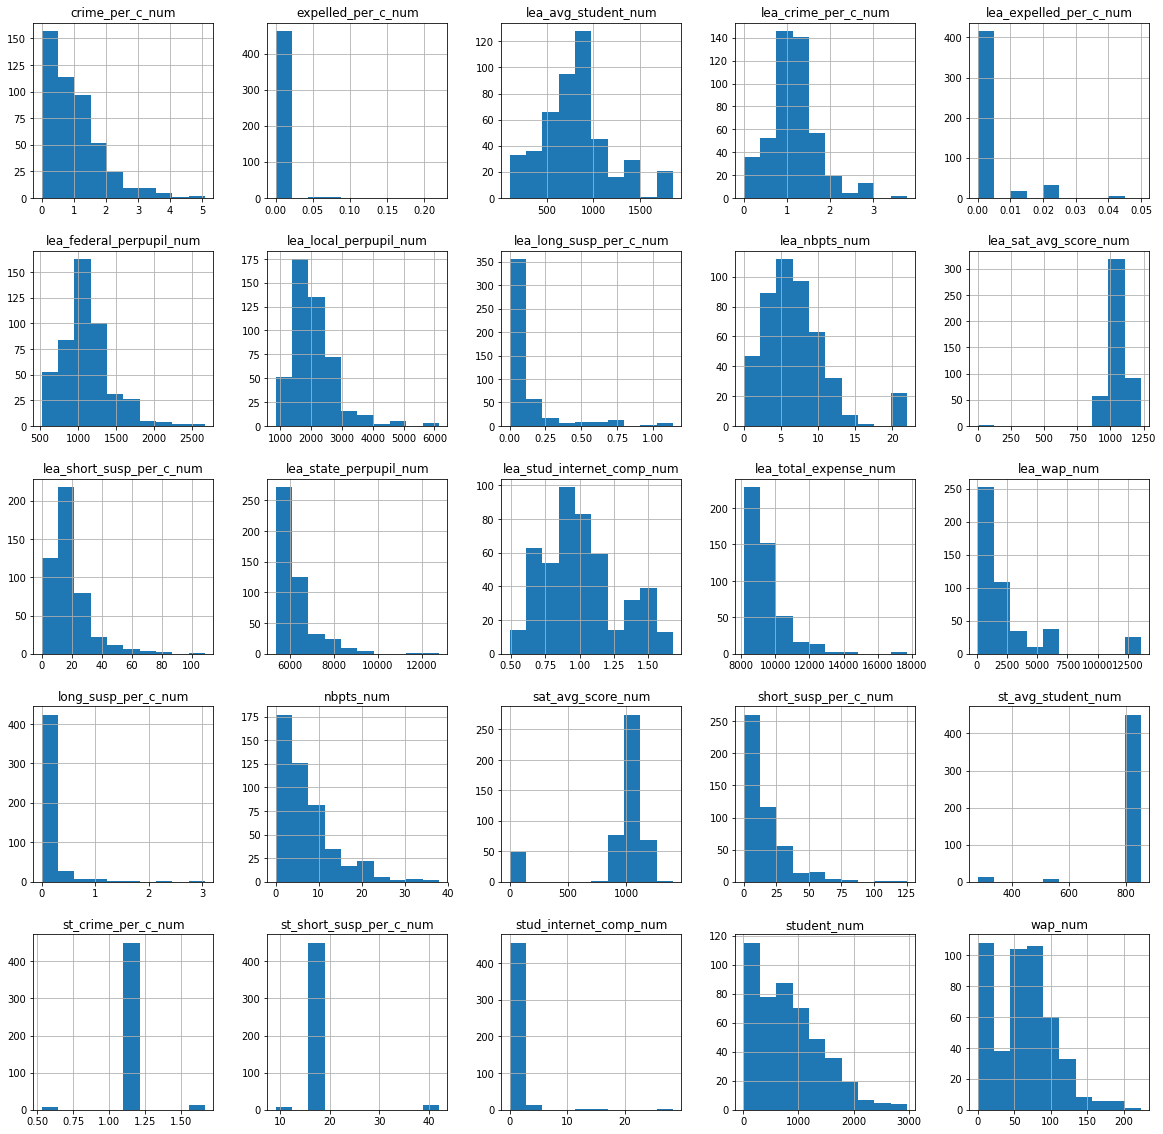

In [43]:
ordinalM = [colNames for colNames in dfPublicHS if '_num' in colNames]
ax42 = dfPublicHS.hist(column = ordinalM, figsize = (20,20))

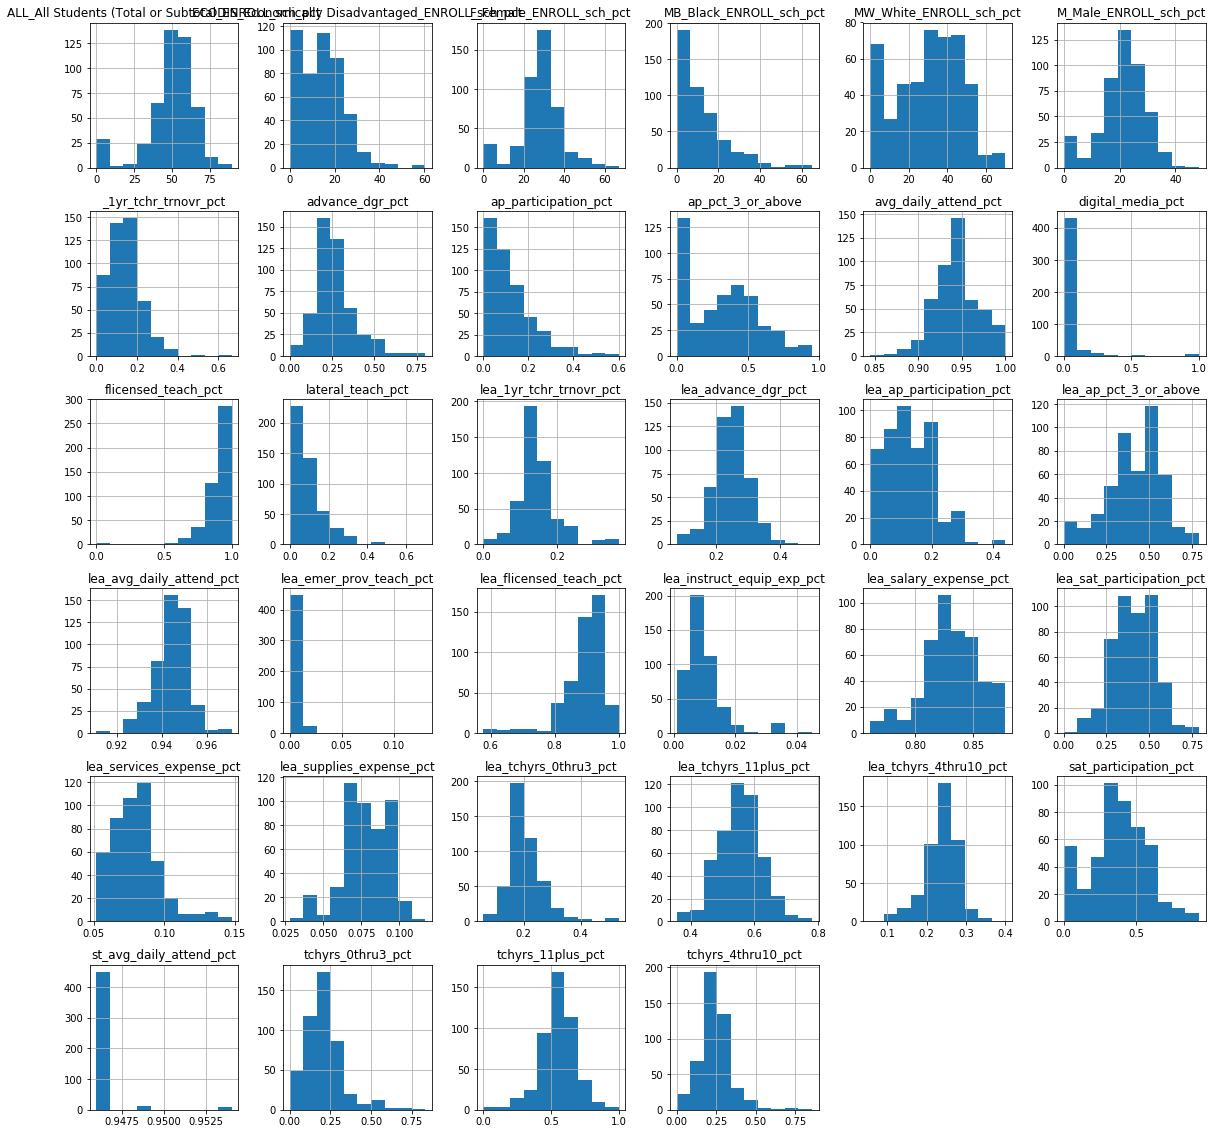

In [44]:
ordinalM = [colNames for colNames in dfPublicHS if '_pct' in colNames]
ax42 = dfPublicHS.hist(column = ordinalM, figsize = (20,20))

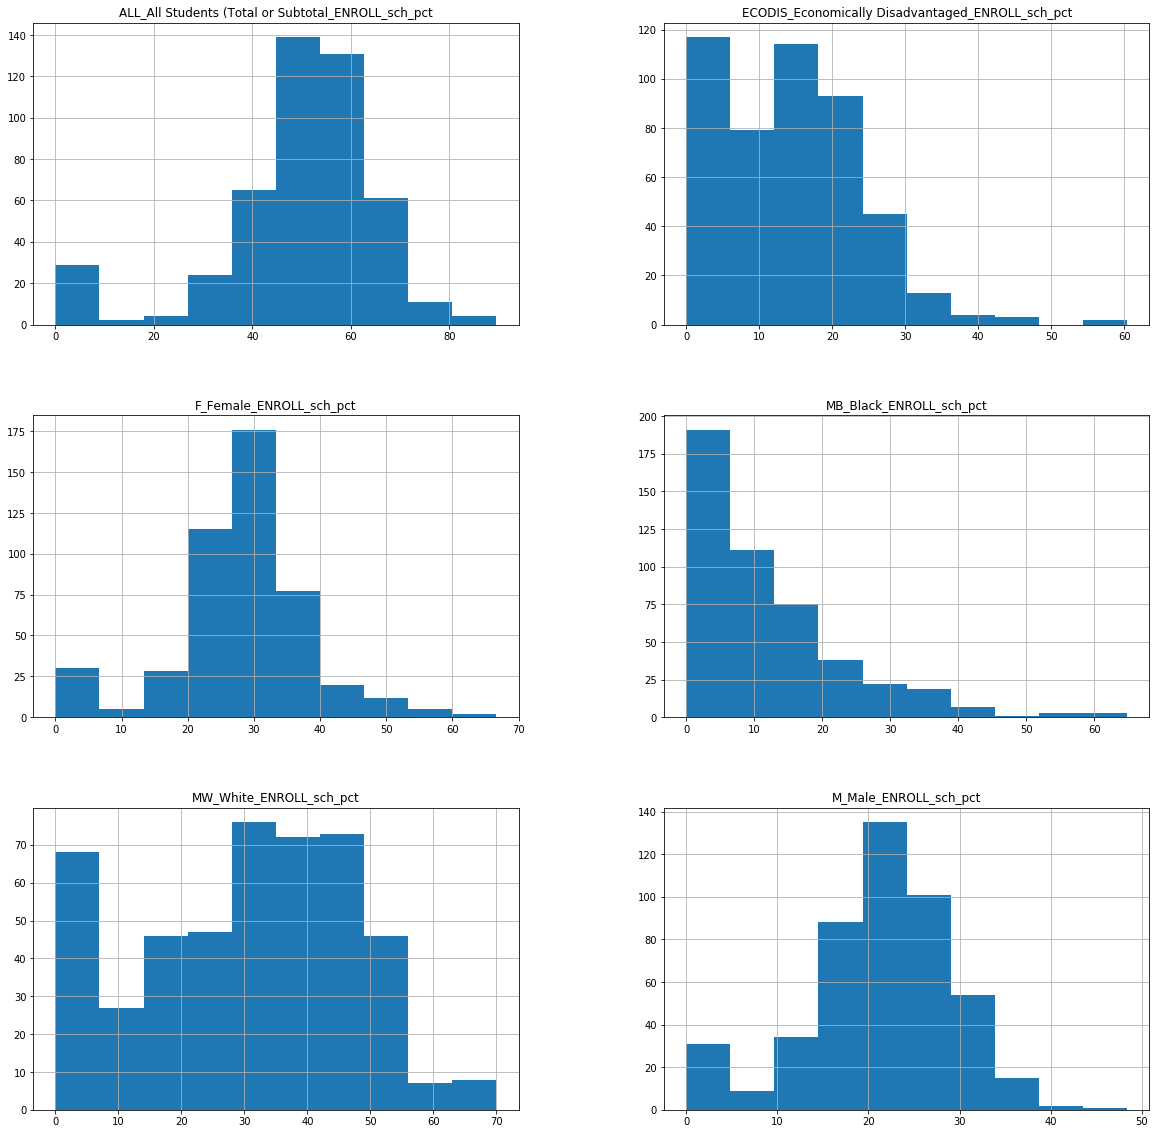

In [45]:
ordinalM = [colNames for colNames in dfPublicHS if '_ENROLL_' in colNames]
ax42 = dfPublicHS.hist(column = ordinalM, figsize = (20,20))

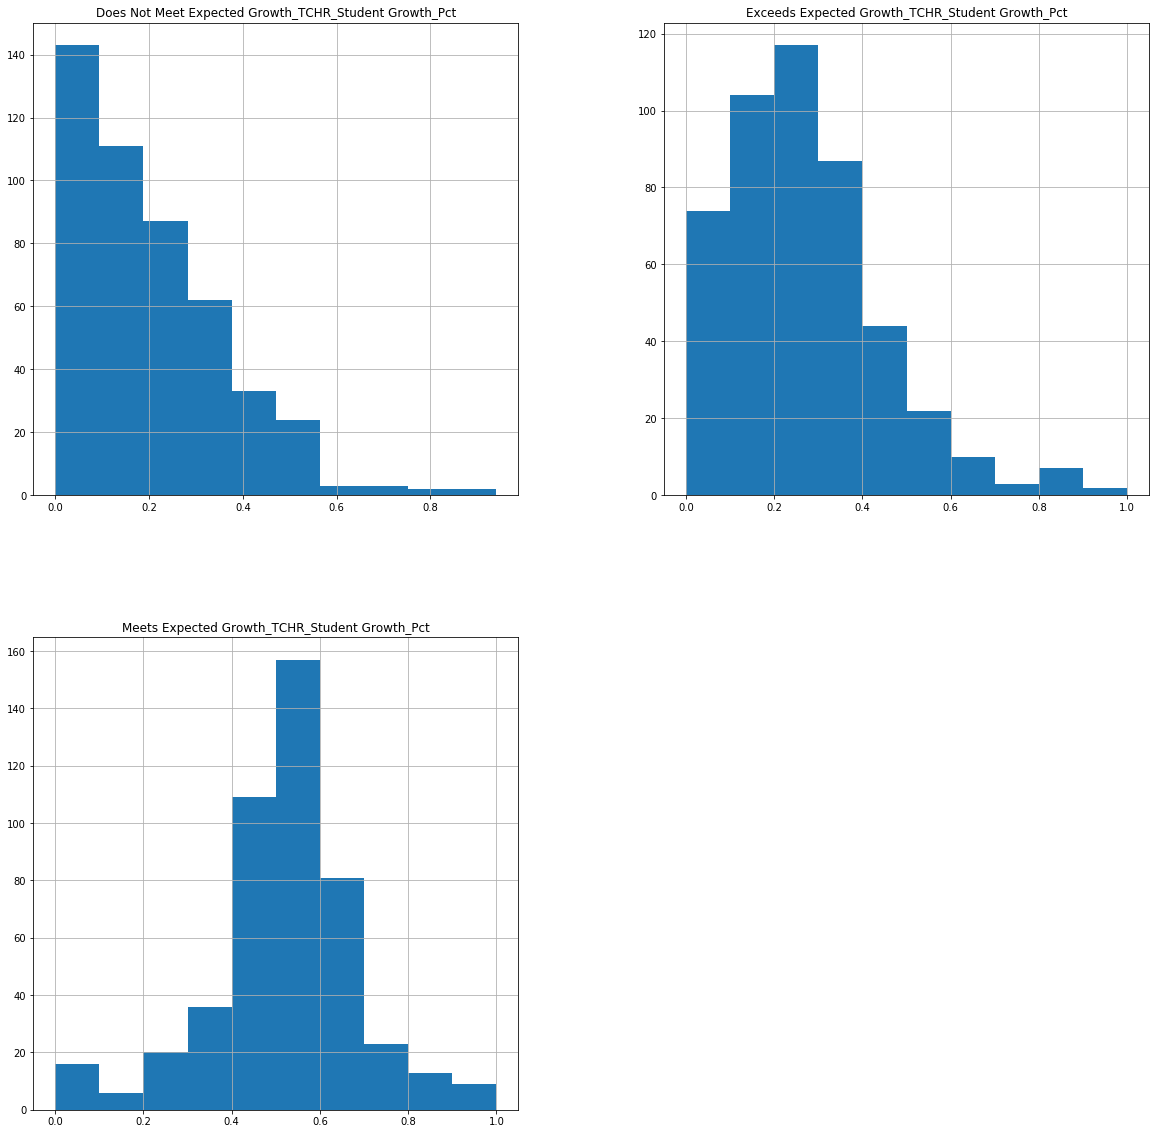

In [74]:
ordinalM = [colNames for colNames in dfPublicHS if 'Expected Growth' in colNames]
ax42 = dfPublicHS.hist(column = ordinalM, figsize = (20,20))

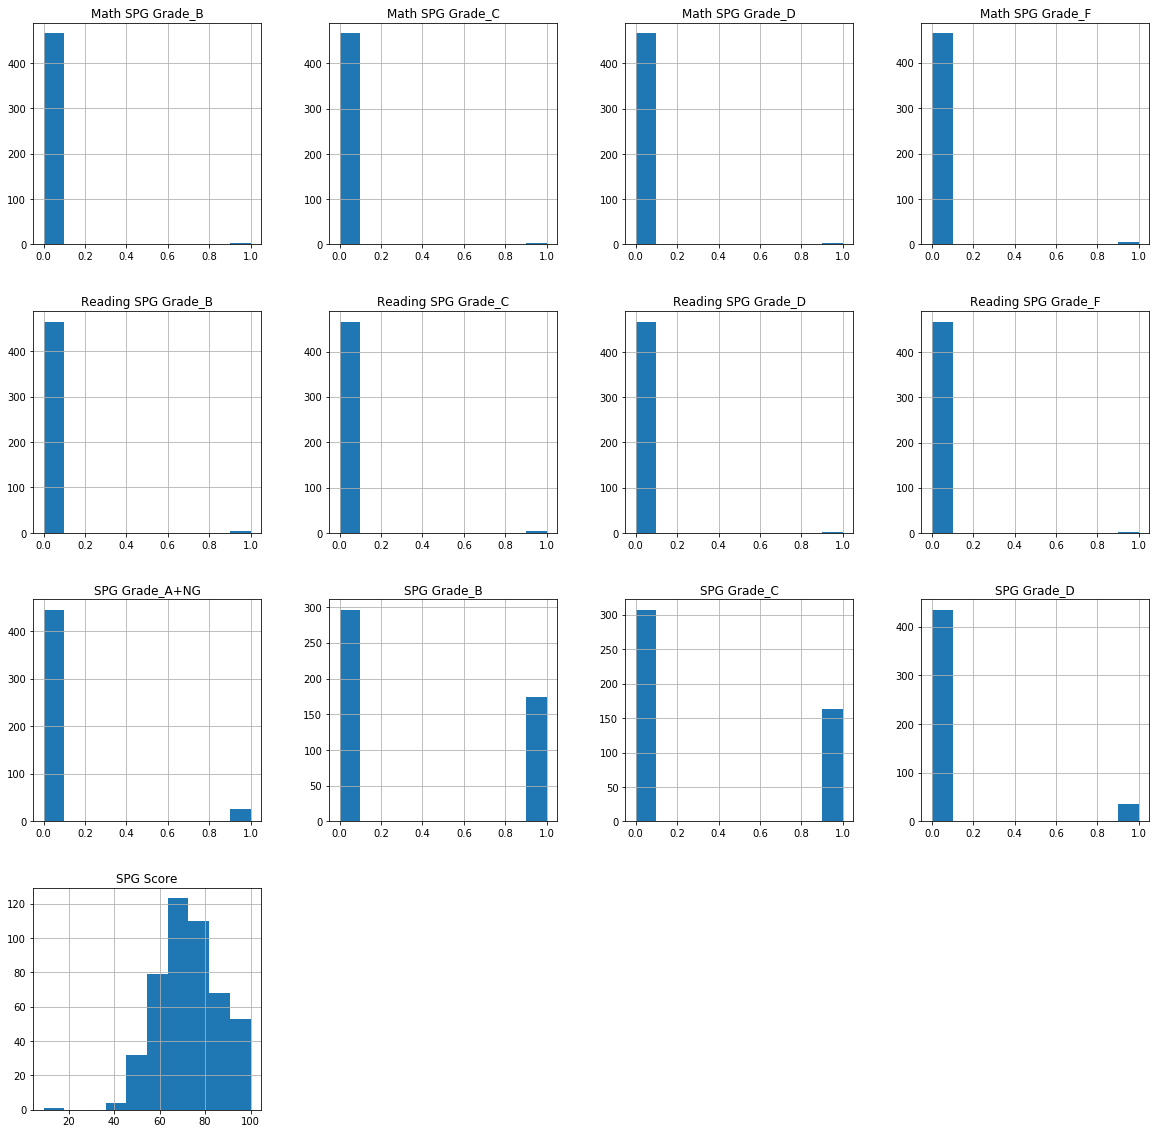

In [76]:
ordinalM = [colNames for colNames in dfPublicHS if 'SPG' in colNames]
ax42 = dfPublicHS.hist(column = ordinalM, figsize = (20,20))

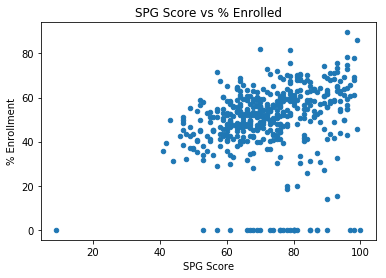

In [78]:
ax = dfPublicHS.plot.scatter(x='SPG Score', y='ALL_All Students (Total or Subtotal_ENROLL_sch_pct') \
 .set(title='SPG Score vs % Enrolled',
      xlabel='SPG Score',
      ylabel='% Enrollment')

In [79]:
dfPublicHS['SPG Score'].describe()

count   470.00
mean     72.73
std      13.17
min       9.00
25%      64.00
50%      72.00
75%      82.00
max     100.00
Name: SPG Score, dtype: float64

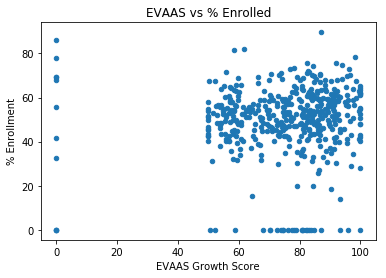

In [80]:
ax = dfPublicHS.plot.scatter(x='EVAAS Growth Score', y='ALL_All Students (Total or Subtotal_ENROLL_sch_pct') \
 .set(title='EVAAS vs % Enrolled',
      xlabel='EVAAS Growth Score',
      ylabel='% Enrollment')

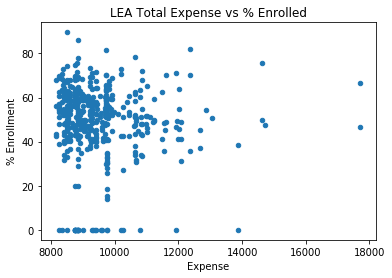

In [81]:
ax = dfPublicHS.plot.scatter(x='lea_total_expense_num', y='ALL_All Students (Total or Subtotal_ENROLL_sch_pct') \
 .set(title='LEA Total Expense vs % Enrolled',
      xlabel='Expense',
      ylabel='% Enrollment')

In [85]:
## HUH
dfExpect = dfPublicHS['Does Not Meet Expected Growth_TCHR_Student Growth_Pct'], dfPublicHS['Exceeds Expected Growth_TCHR_Student Growth_Pct'], dfPublicHS['Meets Expected Growth_TCHR_Student Growth_Pct']

In [91]:
## What
dfExpect.head()

AttributeError: 'tuple' object has no attribute 'head'

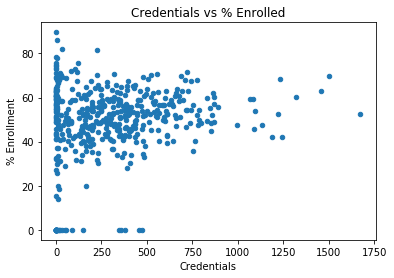

In [90]:
ax = dfPublicHS.plot.scatter(x='Number_Industry_Recognized_Crede', y='ALL_All Students (Total or Subtotal_ENROLL_sch_pct') \
 .set(title='Credentials vs % Enrolled',
      xlabel='Credentials',
      ylabel='% Enrollment')

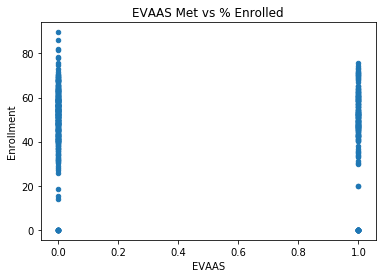

In [94]:
## Better way to plot this - 
ax = dfPublicHS.plot.scatter(x='EVAAS Growth Status_Met', y='ALL_All Students (Total or Subtotal_ENROLL_sch_pct') \
 .set(title='EVAAS Met vs % Enrolled',
      xlabel='EVAAS', ylabel='Enrollment')

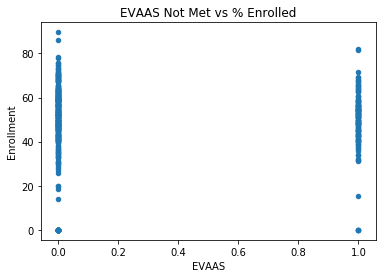

In [95]:
## Better way
ax = dfPublicHS.plot.scatter(x='EVAAS Growth Status_NotMet', y='ALL_All Students (Total or Subtotal_ENROLL_sch_pct') \
 .set(title='EVAAS Not Met vs % Enrolled',
      xlabel='EVAAS', ylabel='Enrollment')

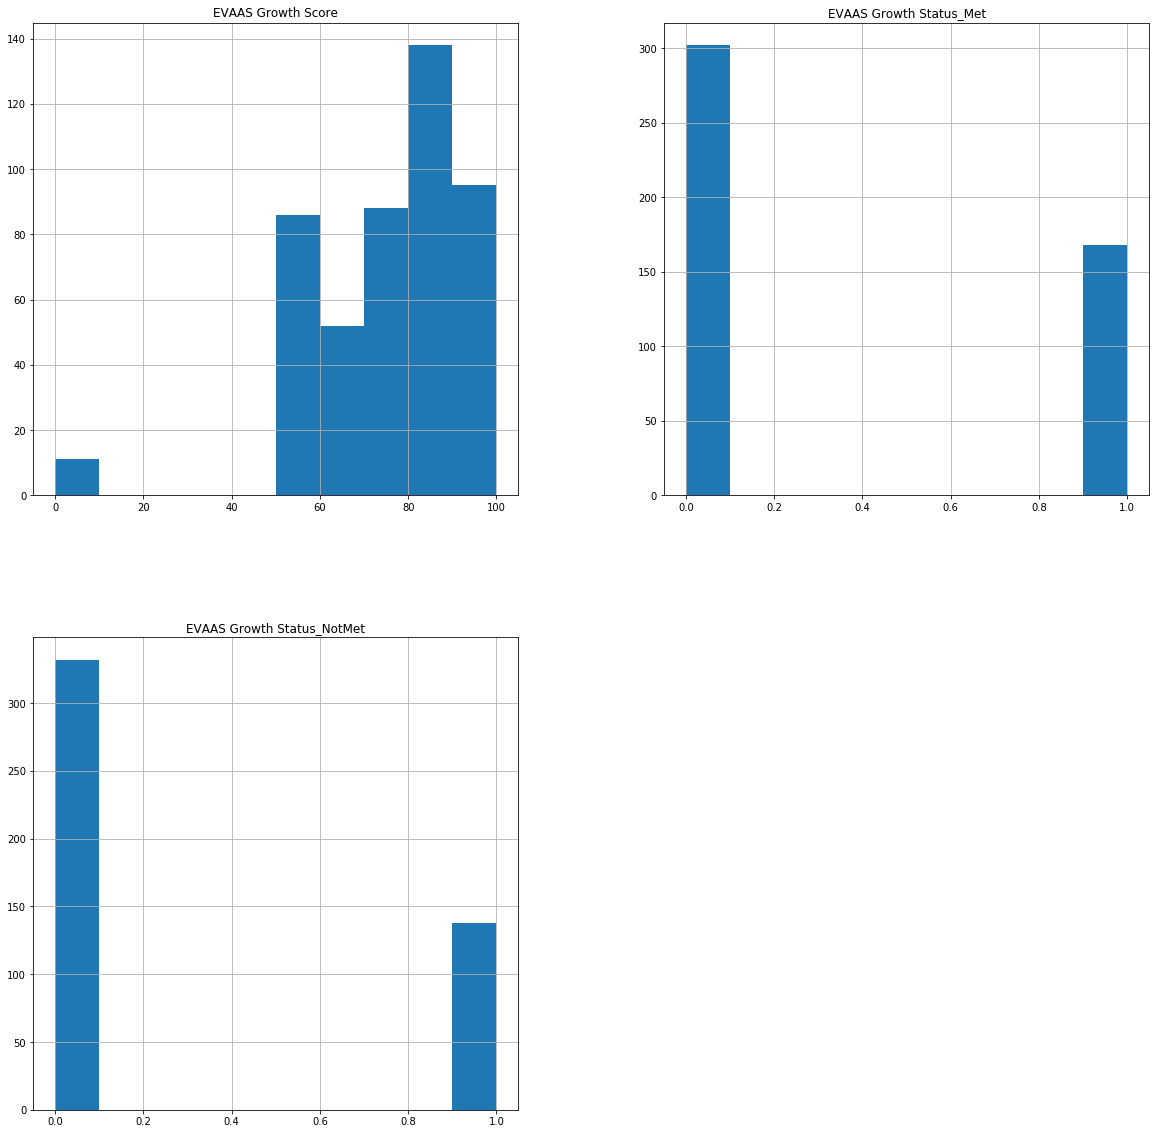

In [96]:
ordinalM = [colNames for colNames in dfPublicHS if 'EVAAS' in colNames]
ax42 = dfPublicHS.hist(column = ordinalM, figsize = (20,20))

In [97]:
dfPublicHS['EVAAS Growth Status_Met'].sum()

168

In [98]:
dfPublicHS['EVAAS Growth Status_NotMet'].sum()

138

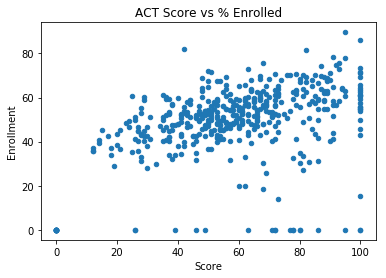

In [99]:
ax = dfPublicHS.plot.scatter(x='ACT Score', y='ALL_All Students (Total or Subtotal_ENROLL_sch_pct') \
 .set(title='ACT Score vs % Enrolled',
      xlabel='Score', ylabel='Enrollment')